In [1]:
from IPython.display import Latex

from lmfit import Model
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = (8,6)
pp = PdfPages('../images/multipage.pdf')

In [2]:
L = 6
file = f'data/{L}.csv'

df = pd.read_csv(file)
df['M2'] = df.M**2
df['deltaM2'] = 2*df.M*df.deltaM
df

,Temp,h,Cv,deltaCv,M,deltaM,Chi,deltaChi,M2,deltaM2
0,2.22,0.00,1.204910,0.041531,0.429596,0.000157,0.826325,641.137,0.184553,0.000135
1,2.22,0.05,1.831040,0.055737,0.459848,0.000194,1.078950,811.105,0.211460,0.000179
2,2.22,0.10,1.319560,0.044334,0.520412,0.000138,0.543692,646.251,0.270829,0.000144
3,2.22,0.15,1.630930,0.051261,0.542731,0.000132,0.546095,637.498,0.294557,0.000143
4,2.22,0.20,1.252950,0.046721,0.583155,0.000139,0.325037,618.197,0.340070,0.000162
...,...,...,...,...,...,...,...,...,...,...
99,3.30,2.00,0.940287,0.034702,0.634625,0.000056,0.115862,231.250,0.402749,0.000071
100,3.60,2.00,0.807141,0.026595,0.583432,0.000057,0.106762,17.583,0.340393,0.000066
101,3.90,2.00,0.900258,0.033091,0.533491,0.000097,0.151729,247.454,0.284613,0.000104
102,4.20,2.00,0.676790,0.012562,0.487579,0.000060,0.131880,160.910,0.237733,0.000059


In [3]:
dfh00 = df[df.h == 0.0].copy()
dfh10 = df[df.h == 1.0].copy()
dfh20 = df[df.h == 2.0].copy()

Tct = 2.22

# $C_v$

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 26
    # variables        = 2
    chi-square         = 18306421.4
    reduced chi-square = 762767.560
    Akaike info crit   = 354.081314
    Bayesian info crit = 356.597507
[[Variables]]
    alpha:  0.20135905 +/- 0.00433761 (2.15%) (init = 0.2)
    q:     -0.97517932 +/- 0.00357154 (0.37%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, q) = -0.982

    alpha:  0.08269265 +/- 0.03669473 (44.37%) (init = 0.2)
    q:      0.26848447 +/- 0.12826130 (47.77%) (init = 1)



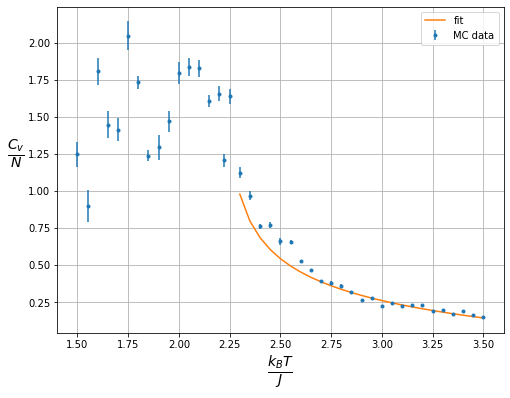

In [4]:
plt.errorbar(dfh00.Temp, dfh00.Cv, fmt='.', yerr=dfh00.deltaCv, label='MC data')


Cv = lambda T, alpha, q: ((T-Tct)/Tct)**(-alpha) + q

df_model = dfh00[dfh00.Temp > Tct]

Cv_model = Model(Cv)
fit = Cv_model.fit(df_model.Cv.values, T=df_model.Temp.values, weights=1/df_model.deltaCv.values**2,
                   alpha=0.2, q=1, nan_policy='propagate')
print(fit.fit_report())

plt.plot(df_model.Temp.values[1:], fit.best_fit[1:], label='fit')

alpha = float(fit.fit_report().split('alpha: ')[1].split('+/-')[0])
deltAlpha = float(fit.fit_report().split('alpha: ')[1].split('+/-')[1].split('(')[0])

Cv = lambda T, alpha, q: ((Tct-T)/Tct)**(-alpha) + q

df_model = dfh00[dfh00.Temp < Tct]

Cv_model = Model(Cv)
fit = Cv_model.fit(df_model.Cv.values, T=df_model.Temp.values, weights=1/df_model.deltaCv.values**2,
                   alpha=0.2, q=1, nan_policy='propagate')
print(fit.fit_report().split('[[Variables]]')[-1].split('[')[0])

# plt.plot(df_model.Temp.values[1:], fit.best_fit[1:], label='fit')

plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{C_v}{N}$   ', fontsize=20, rotation='horizontal')
plt.grid()
plt.legend()
pp.savefig()
plt.show()

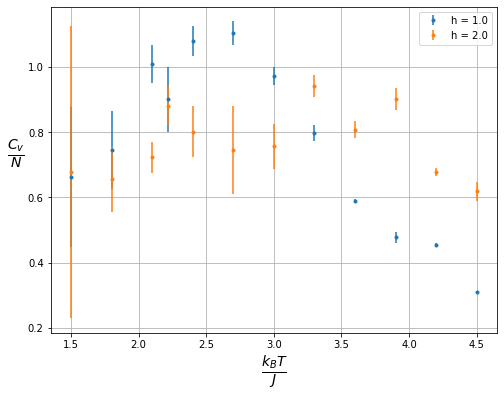

In [5]:
plt.errorbar(dfh10.Temp, dfh10.Cv, fmt='.', yerr=dfh10.deltaCv, label='h = 1.0')
plt.errorbar(dfh20.Temp, dfh20.Cv, fmt='.', yerr=dfh20.deltaCv, label='h = 2.0')

plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{C_v}{N}$   ', fontsize=20, rotation='horizontal')
plt.legend()
plt.grid()
pp.savefig()
plt.show()

# M

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 15
    # variables        = 1
    chi-square         = 1.7402e+13
    reduced chi-square = 1.2430e+12
    Akaike info crit   = 418.693727
    Bayesian info crit = 419.401777
[[Variables]]
    beta:  0.43759842 +/- 0.00191346 (0.44%) (init = 0.4)


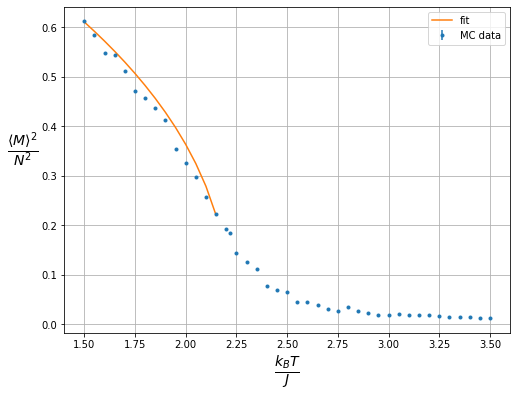

In [6]:
plt.errorbar(dfh00.Temp, dfh00.M2, fmt='.', yerr=dfh00.deltaM2, label='MC data')

M2 = lambda T, beta: ((Tct-T)/Tct)**(beta)

df_model = dfh00[dfh00.Temp < Tct]

M2_model = Model(M2)
fit = M2_model.fit(df_model.M2.values, T=df_model.Temp.values, weights=1/df_model.deltaM2.values**2,
                   beta=0.4, nan_policy='propagate')
print(fit.fit_report())

beta = float(fit.fit_report().split('beta: ')[1].split('+/-')[0])
deltaBeta = float(fit.fit_report().split('beta: ')[1].split('+/-')[1].split('(')[0])

plt.plot(df_model.Temp.values[:-1], fit.best_fit[:-1], label='fit')

plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{\\langle M \\rangle^2}{N^2}$     ', fontsize=20, rotation='horizontal')
plt.grid()
plt.legend()
pp.savefig()
plt.show()

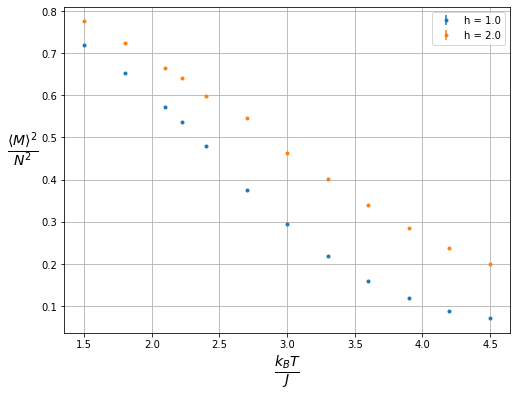

In [7]:
plt.errorbar(dfh10.Temp, dfh10.M2, fmt='.', yerr=dfh10.deltaM2, label='h = 1.0')
plt.errorbar(dfh20.Temp, dfh20.M2, fmt='.', yerr=dfh20.deltaM2, label='h = 2.0')

plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{\\langle M \\rangle^2}{N^2}$     ', fontsize=20, rotation='horizontal')
plt.legend()
plt.grid()
pp.savefig()
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 41
    # variables        = 2
    chi-square         = 1.5511e+14
    reduced chi-square = 3.9772e+12
    Akaike info crit   = 1191.42502
    Bayesian info crit = 1194.85216
[[Variables]]
    delta:  3.86166994 +/- 0.08769417 (2.27%) (init = 5)
    k:      0.53484536 +/- 0.00138548 (0.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(delta, k) =  0.645


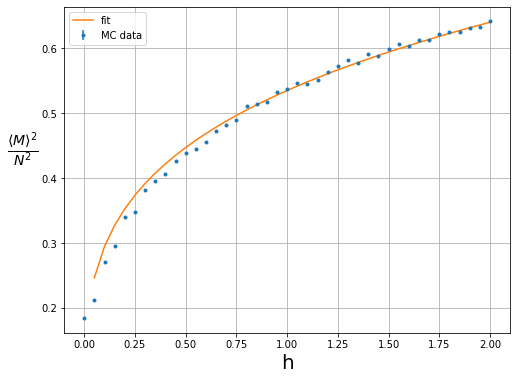

In [8]:
dfTc = df[df.Temp == 2.22]
plt.errorbar(dfTc.h, dfTc.M2, fmt='.', yerr=dfTc.deltaM2, label='MC data')

M2 = lambda h, delta, k : k*h**(1/delta)

M2_model = Model(M2)
fit = M2_model.fit(dfTc.M2.values, h=dfTc.h.values, weights=1/dfTc.deltaM2.values**2,
                   delta=5, k=1, nan_policy='propagate')
print(fit.fit_report())

delta = float(fit.fit_report().split('delta: ')[1].split('+/-')[0])
deltaDelta = float(fit.fit_report().split('delta: ')[1].split('+/-')[1].split('(')[0])

plt.plot(dfTc.h.values[1:], fit.best_fit[1:], label='fit')

plt.xlabel('h', fontsize=20)
plt.ylabel('$\\frac{\\langle M \\rangle^2}{N^2}$     ', fontsize=20, rotation='horizontal')
plt.grid()
plt.legend()
pp.savefig()
plt.show()

In [9]:
d = 3

nu1 = (2-alpha)/d
deltaNu1 = deltAlpha/d

nu2 = beta/d*(delta+1)
deltaNu2 = nu2 * np.sqrt((deltaBeta/beta)**2 + (deltaDelta/delta)**2)

nu = np.mean([nu2, nu1])
deltaNu = np.sqrt(deltaNu1**2 + deltaNu2**2) / 2

gamma = d*nu- 2*beta
deltaGamma = np.sqrt((d*deltaNu)**2 + (2*deltaBeta)**2)

display(Latex(f'$\\nu_1 = ({nu1:.3f} \pm {deltaNu1:.3f})$'))
display(Latex(f'$\\nu_2 = ({nu2:.3f} \pm {deltaNu2:.3f})$'))
display(Latex(f'$\\nu = ({nu:.3f} \pm {deltaNu:.3f})$'))
display(Latex(f'$\\gamma = ({gamma:.3f} \pm {deltaGamma:.3f})$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
pp.close()